In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ../../

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import Milan

/home/zzw/Code/milan/Spatio-Temporal-Analysis-Telecom-Italia


In [2]:
## prepare data
milan = Milan(time_range='30days', aggr_time=None, tele_column='mobile', grid_range=None)
milan.prepare_data()
milan.setup()
milan_train = np.concatenate((milan.milan_train, milan.milan_val), axis=0)
milan_test = milan.milan_test
milan_train = milan_train.reshape((milan_train.shape[0], -1))
milan_test = milan_test.reshape((milan_test.shape[0], -1))
milan_data = np.concatenate((milan_train, milan_test), axis=0)

loading data from file: data/sms-call-internet-mi/sms-call-internet-mi-2013-11-01.csv
loading data from file: data/sms-call-internet-mi/sms-call-internet-mi-2013-11-02.csv
loading data from file: data/sms-call-internet-mi/sms-call-internet-mi-2013-11-03.csv
loading data from file: data/sms-call-internet-mi/sms-call-internet-mi-2013-11-04.csv
loading data from file: data/sms-call-internet-mi/sms-call-internet-mi-2013-11-05.csv
loading data from file: data/sms-call-internet-mi/sms-call-internet-mi-2013-11-06.csv
loading data from file: data/sms-call-internet-mi/sms-call-internet-mi-2013-11-07.csv
loading data from file: data/sms-call-internet-mi/sms-call-internet-mi-2013-11-08.csv
loading data from file: data/sms-call-internet-mi/sms-call-internet-mi-2013-11-09.csv
loading data from file: data/sms-call-internet-mi/sms-call-internet-mi-2013-11-10.csv
loading data from file: data/sms-call-internet-mi/sms-call-internet-mi-2013-11-11.csv
loading data from file: data/sms-call-internet-mi/sms-

In [5]:
milan_data_avg = milan_data.mean(axis=0)
milan_data_avg = milan_data_avg.reshape((100, 100))
milan_max_region = np.zeros((71, 71))
# get the max 30x30 area of the average
for i in range(100-30+1):
    for j in range(100-30+1):
        milan_max_region[i, j] = np.mean(milan_data_avg[i:i+30, j:j+30])

<AxesSubplot:>

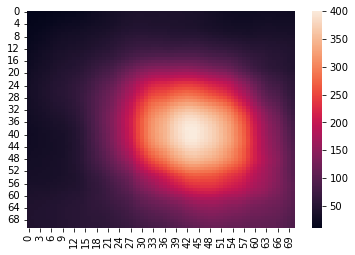

In [8]:
milan_max_region.shape
sns.heatmap(milan_max_region)

In [10]:
np.unravel_index(milan_max_region.argmax(), milan_max_region.shape)

(39, 43)

In [14]:
milan_max_region[40, 40]

386.5826416015625

# ETT

In [11]:
base_dir = '~/Code/milan/Informer2020/data/ETT'
data_file = 'WTH.csv'
data = pd.read_csv(os.path.join(base_dir, data_file))

In [12]:
data.head()

,date,Visibility,DryBulbFarenheit,DryBulbCelsius,WetBulbFarenheit,DewPointFarenheit,DewPointCelsius,RelativeHumidity,WindSpeed,WindDirection,StationPressure,Altimeter,WetBulbCelsius
0,1/1/2010 0:00,10.0,16,-9,13,7,-14,67,7,130,21.65,30.35,-10.3
1,1/1/2010 1:00,10.0,16,-9,13,7,-14,67,5,150,21.64,30.34,-10.3
2,1/1/2010 2:00,10.0,16,-9,13,7,-14,67,5,190,21.65,30.35,-10.3
3,1/1/2010 3:00,10.0,16,-9,13,7,-14,67,7,180,21.65,30.35,-10.3
4,1/1/2010 4:00,10.0,16,-9,14,9,-13,74,6,120,21.64,30.34,-10.0


In [14]:
data.values.shape

(35064, 13)

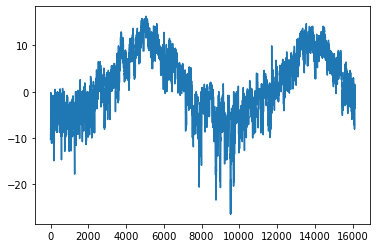

In [16]:
plt.plot(data['WetBulbCelsius'].values[:24 * 7 * 4 *12*2])
plt.show()

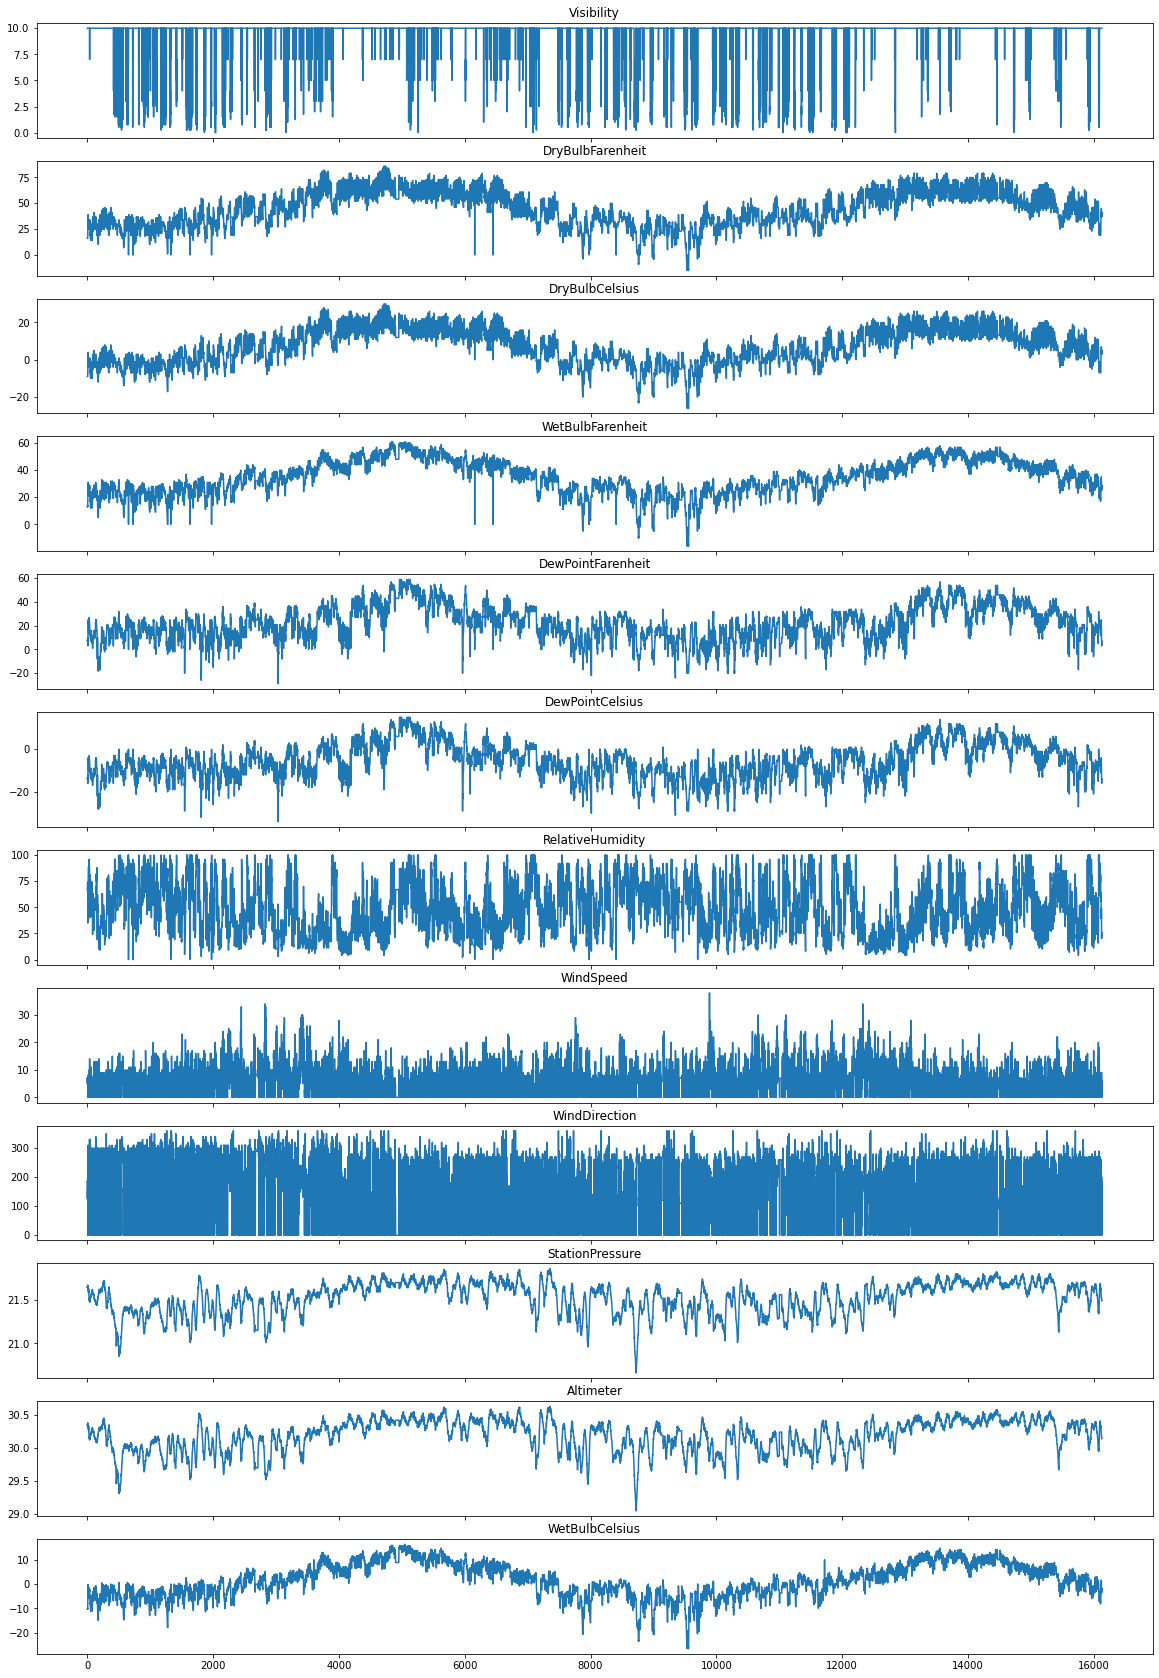

In [18]:
fig, axn = plt.subplots(12, 1, figsize=(20, 30), sharex=True)
for i, ax in enumerate(axn.flat):
    ax.plot(data.values[:24 * 7*4*12*2, i+1])
    ax.set_title(data.columns[i+1])
fig.show()

# Aggregate Period Analysis

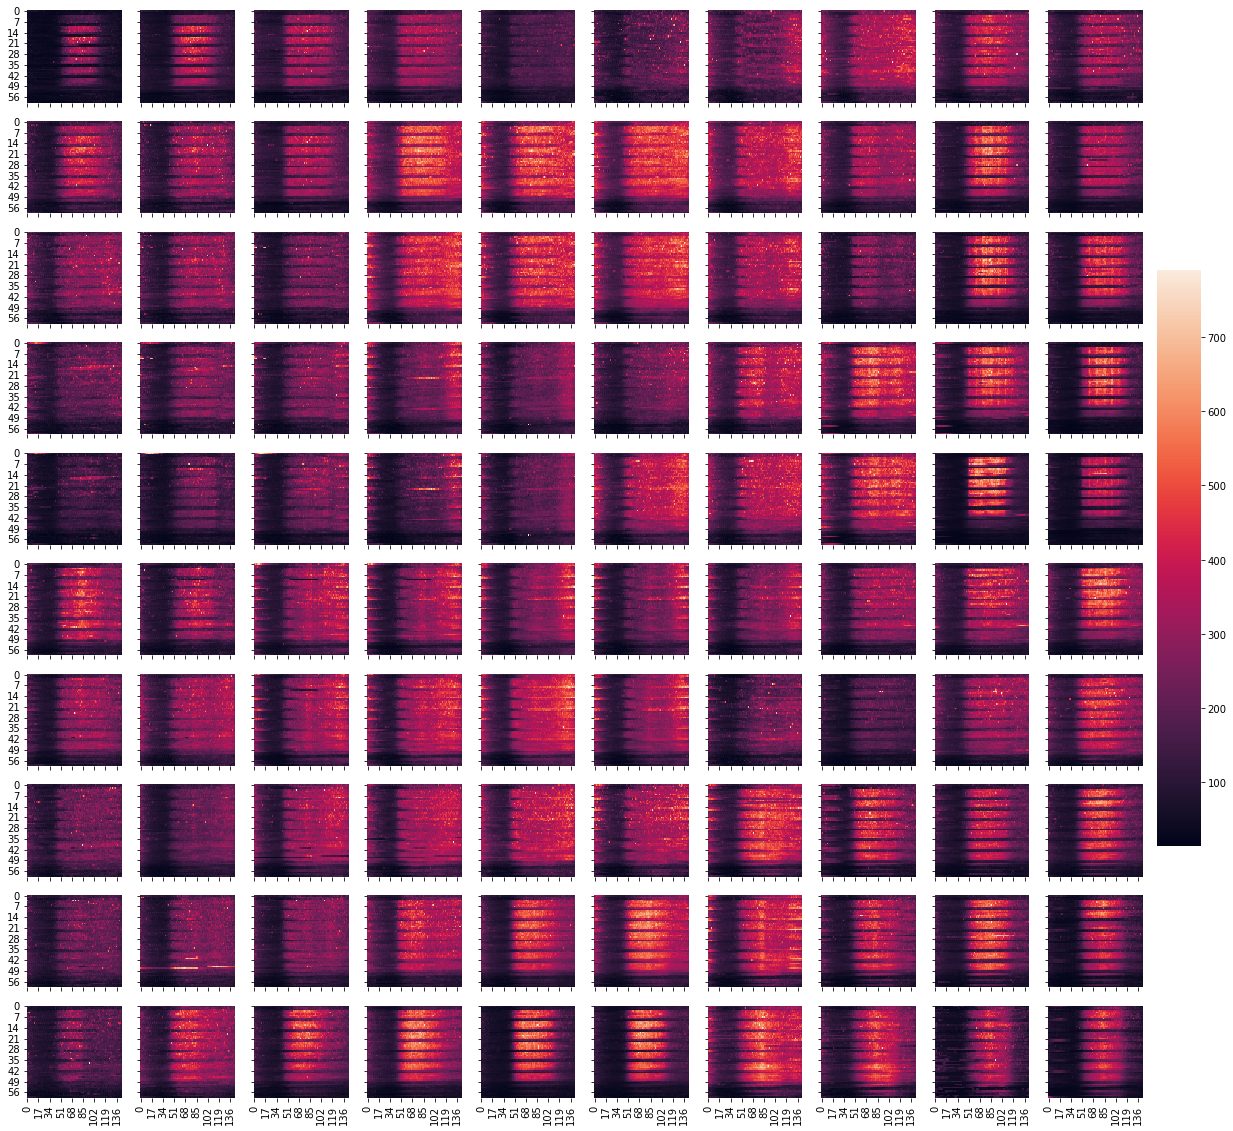

In [12]:
fig, axn = plt.subplots(10, 10, figsize=(20, 20), sharex=True, sharey=True)

cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i, ax in enumerate(axn.flat):
    sns.heatmap(milan_grid_data[:,:,i], ax=ax,
                cbar=i == 0, cbar_ax=None if i else cbar_ax)

fig.show()

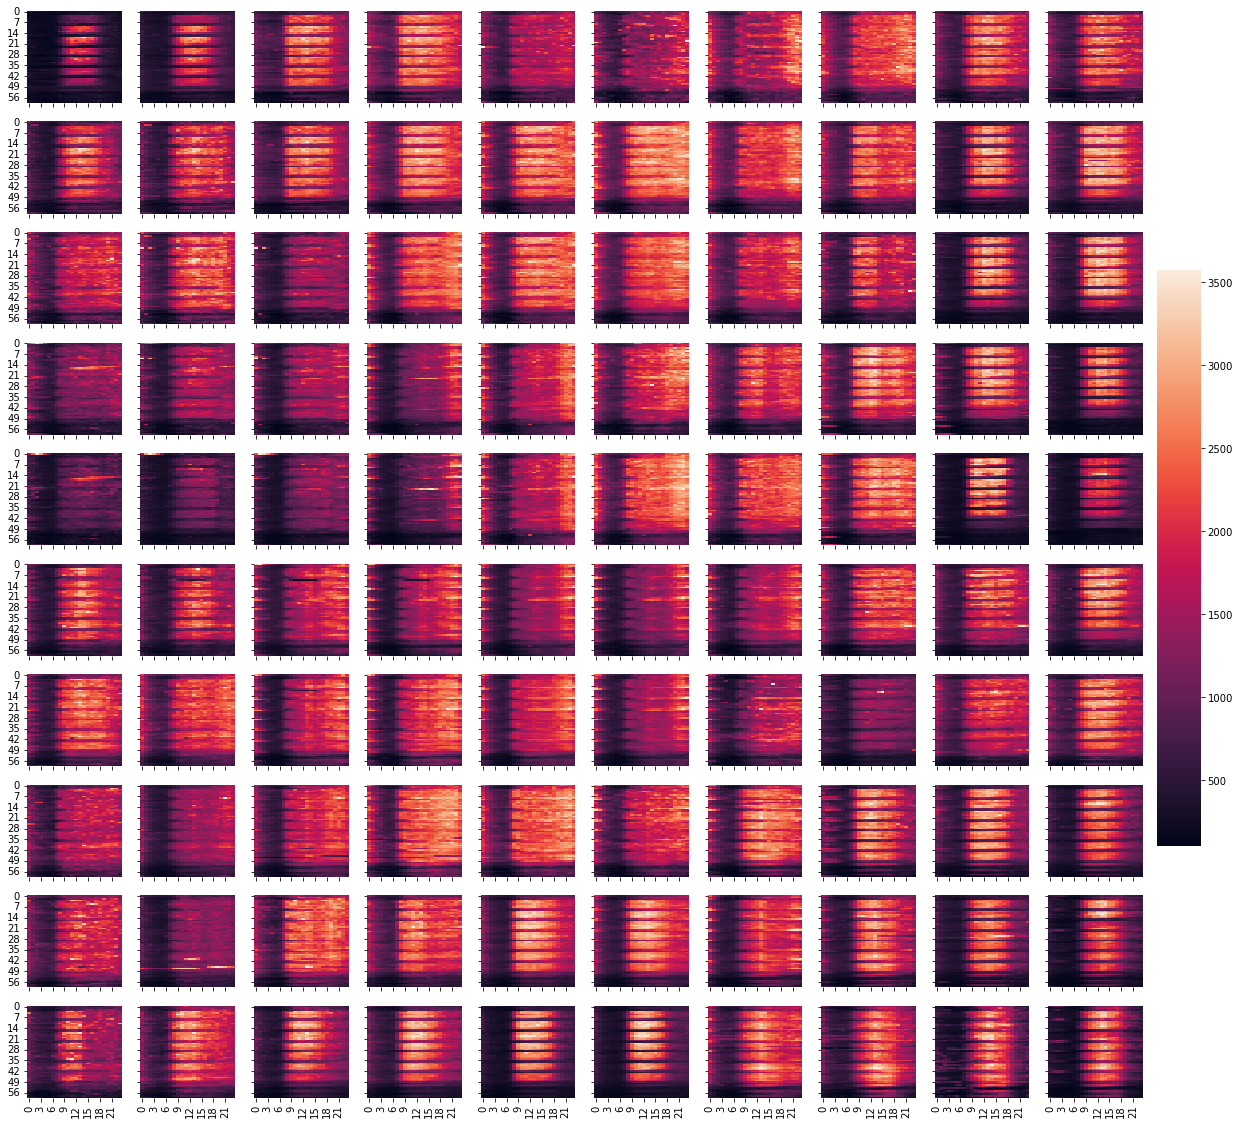

In [13]:
fig, axn = plt.subplots(10, 10, figsize=(20, 20), sharex=True, sharey=True)

cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i, ax in enumerate(axn.flat):
    sns.heatmap(mialn_grid_data_hour[:,:,i], ax=ax,
                cbar=i == 0, cbar_ax=None if i else cbar_ax)

fig.show()